In [126]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from hw2_template import Conv2D
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
label = np.load('label.npy')
utek = np.load('utek.npy')

utekt = (torch.from_numpy(utek).permute(2, 0, 1)).float()
labelt =  torch.from_numpy(label).float().unsqueeze(0)
utekt.shape, labelt.shape

(torch.Size([3, 200, 200]), torch.Size([1, 200, 200]))

In [182]:
np.sum(utek, axis=2).shape

(200, 200)

In [139]:
# plt.imshow(np.sum(utek, axis=2), interpolation='nearest')
# plt.show()

In [197]:
weights = (utekt[:, 72:87, 142:157])
weights = weights / (weights**2).sum()
weights = weights.squeeze(0)
# weights = weights / (17 * 17)
# weights[0] = weights[0] / torch.sqrt((weights[0]**2).sum())
# weights[1] = weights[1] / torch.sqrt((weights[1]**2).sum())
# weights[2] = weights[2] / torch.sqrt((weights[2]**2).sum())
# print((weights * utekt[:, 72:87, 142:157]).sum())
weights.shape, utekt.shape


(torch.Size([3, 15, 15]), torch.Size([3, 200, 200]))

In [199]:
conv = Conv2D(3, kernel_size=weights[0,:,:].shape, padding=7) # Weight tensor as Channels x Height x Width
conv.set_weights(weights=weights)
print(weights.shape, conv.conv.weight.shape)

# x = conv.forward(utekt).detach()
x = conv.forward(utekt)
np.argwhere(x == x.max()), x.shape
# torch.tensor(np.argwhere(x.numpy() == 1.)).T

torch.Size([3, 15, 15]) torch.Size([1, 3, 15, 15])


(tensor([[ 79],
         [149]]),
 torch.Size([200, 200]))

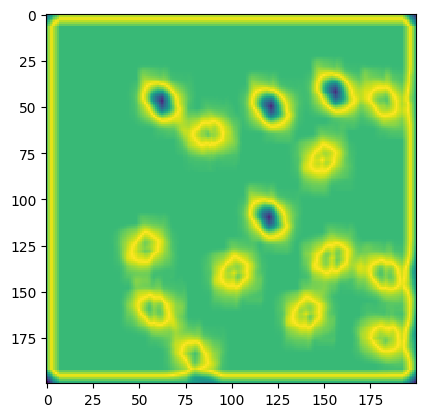

tensor([[-1.6472e-01, -1.4698e-01, -1.2421e-01, -9.0125e-02, -6.1013e-02,
         -3.4856e-02, -1.1451e-03, -3.6439e-02, -4.2968e-02, -3.1418e-02,
         -1.1117e-02, -7.1213e-03, -3.5570e-02, -6.2014e-02, -8.6374e-02],
        [-1.4126e-01, -1.2037e-01, -9.4069e-02, -5.4543e-02, -2.1726e-02,
         -8.1659e-06, -3.0183e-02, -6.5617e-02, -7.6783e-02, -6.9946e-02,
         -5.2014e-02, -3.5091e-02, -3.0490e-03, -2.6231e-02, -5.3646e-02],
        [-1.1760e-01, -9.3947e-02, -6.4531e-02, -1.9859e-02, -1.6238e-02,
         -3.5703e-02, -5.9902e-02, -9.3077e-02, -1.1185e-01, -1.1205e-01,
         -9.7328e-02, -8.2297e-02, -4.7360e-02, -1.4484e-02, -1.7195e-02],
        [-9.4573e-02, -6.8239e-02, -3.6526e-02, -1.0162e-02, -4.6525e-02,
         -6.3885e-02, -8.3830e-02, -1.1160e-01, -1.3567e-01, -1.4027e-01,
         -1.2422e-01, -1.0846e-01, -7.1437e-02, -3.4701e-02, -1.6060e-03],
        [-7.4267e-02, -4.4965e-02, -1.1945e-02, -3.5245e-02, -7.2796e-02,
         -8.5876e-02, -9.3559e-02,

In [185]:
plt.imshow(x, interpolation='nearest')
plt.show()
print((x[72:87, 142:157]))

In [120]:
# conv = torch.nn.Conv2d(
#             in_channels=3, out_channels=1, kernel_size=weights[0, :, :].shape, padding=7)
# conv.weight = torch.nn.Parameter(weights.unsqueeze(0))
# # print(conv.weight.shape)
# x = conv(utekt)

In [200]:
torch.save(weights, "hw2_weights.pt")

In [195]:
conv.conv.weight.shape

torch.Size([1, 3, 15, 15])